In [1]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('HousingData.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Statistical Analysis

In [5]:
# check data type of predictors
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# check the significance
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
for i in df:
    df[i]= df[i].fillna(0.0).astype(float)

In [8]:
# check the total number of null data in each column
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# check the shape of the data
df.shape

(506, 14)

### Univariate Analysis 

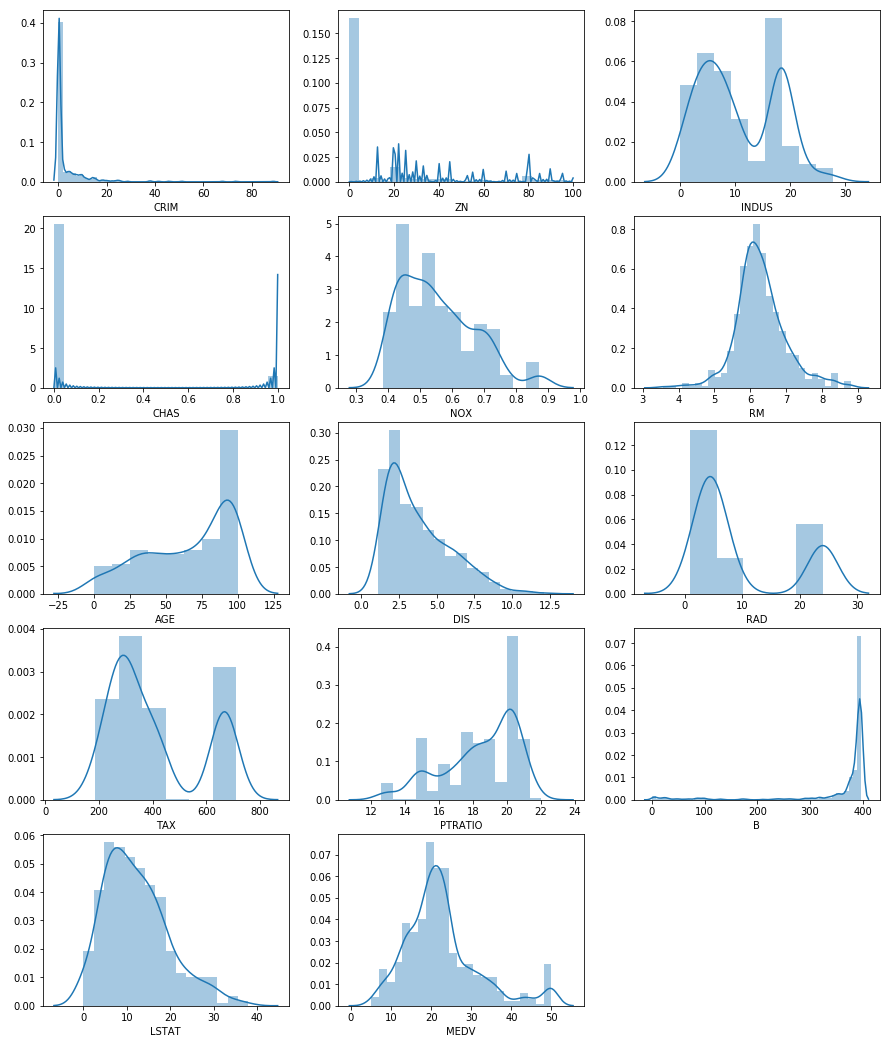

In [10]:
plt.figure(figsize=(15, 60), facecolor='white')
plotnumber =1
for column in df:
    ax = plt.subplot(16, 3, plotnumber)
    sns.distplot(df[column], kde=True)
    plt.xlabel(column, fontsize=10)
    plotnumber+= 1
plt.show()

## check for outliers

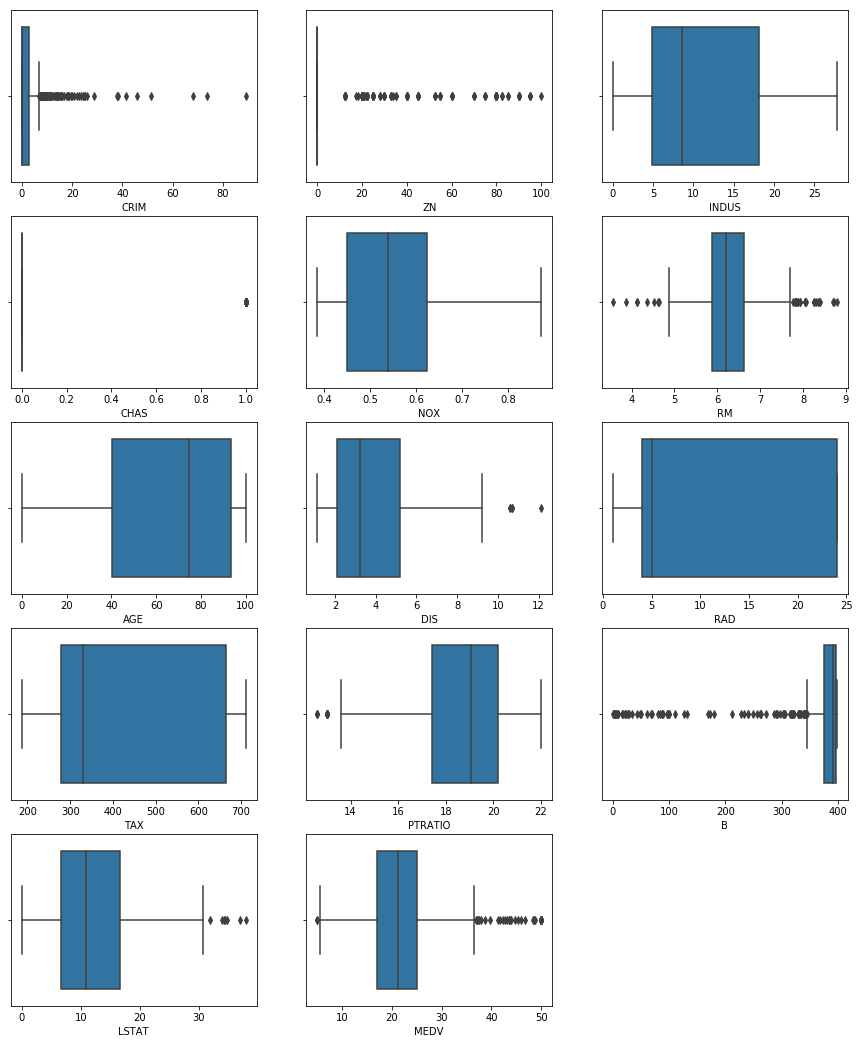

In [12]:
plt.figure(figsize=(15, 60), facecolor='white')
plotnumber =1
for column in df:
    ax = plt.subplot(16, 3, plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column, fontsize=10)
    plotnumber+= 1
plt.show()

### Correlation Analysis

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185559,0.379772,-0.055713,0.410918,-0.220340,0.328997,-0.365901,0.600505,0.559880,0.278243,-0.364886,0.411330,-0.384120
ZN,-0.185559,1.000000,-0.482670,-0.032992,-0.498619,0.312295,-0.470146,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292
INDUS,0.379772,-0.482670,1.000000,0.055833,0.690250,-0.339054,0.488737,-0.662476,0.564867,0.687468,0.372852,-0.341514,0.492359,-0.441371
CHAS,-0.055713,-0.032992,0.055833,1.000000,0.070867,0.106797,0.054485,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844
NOX,0.410918,-0.498619,0.690250,0.070867,1.000000,-0.302188,0.627476,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321
RM,-0.220340,0.312295,-0.339054,0.106797,-0.302188,1.000000,-0.227535,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360
AGE,0.328997,-0.470146,0.488737,0.054485,0.627476,-0.227535,1.000000,-0.641898,0.420382,0.459859,0.239508,-0.214615,0.503452,-0.356699
DIS,-0.365901,0.632428,-0.662476,-0.092318,-0.769230,0.205246,-0.641898,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929
RAD,0.600505,-0.300061,0.564867,-0.003339,0.611441,-0.209847,0.420382,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626
TAX,0.559880,-0.304385,0.687468,-0.035822,0.668023,-0.292048,0.459859,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536


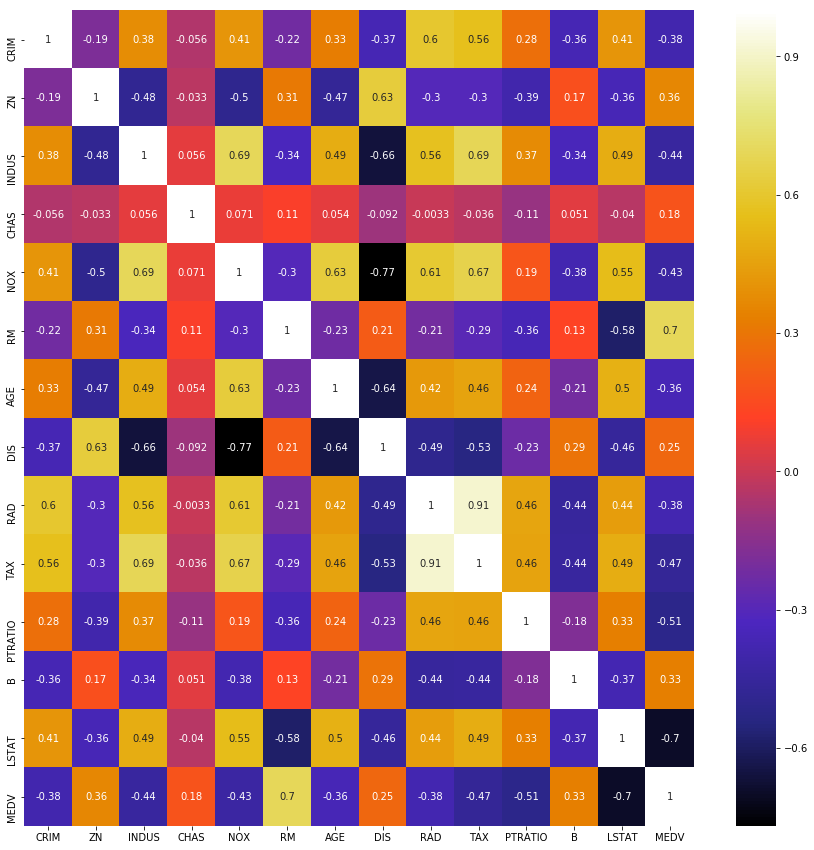

In [14]:
plt.figure(figsize=(15,15), facecolor='white')
sns.heatmap(df.corr(), annot=True, cmap='CMRmap')

### scatter plot analysis 

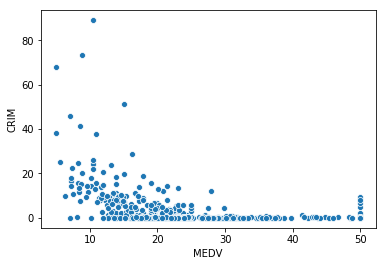

In [15]:
# to check the individual relationship between the predictor and target variable
sns.scatterplot(data=df, y='CRIM', x='MEDV')

## Model Building

#### (a) Splitting predictor and target variable

In [16]:
# assign 0 to 13 variables to x
x = df.iloc[:, :13]

In [18]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,0.00


In [21]:
# assign last variable to y
y = df.iloc[:, -1]

In [23]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Import train test split

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [79]:
print(X_train.shape)
print(y_train.shape)

(339, 13)
(339,)


In [80]:
print(X_test.shape)
print(y_test.shape)

(167, 13)
(167,)


In [81]:
scalar = StandardScaler()
# scale X_train
X_train = scalar.fit_transform(X_train)

In [82]:
# scale X_test
X_test = scalar.fit_transform(X_test)

In [83]:
regression = LinearRegression()

In [84]:
# training
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
regression.score(X_test, y_test)

0.6832840458000937

In [86]:
# calculating the weights
print(regression.coef_)

[-0.48433273  0.83308757 -0.17950051  0.51040739 -1.28363404  3.40120681
 -0.40066859 -2.67161995  2.11586597 -1.69245517 -2.00692061  0.96942012
 -3.25197999]


In [87]:
# calculating the bias
print(regression.intercept_)

22.729203539823008


In [88]:
y_pred = regression.predict(X_test)

In [89]:
y_pred

array([26.60405887, 15.56020132, 25.19741099, 30.42144623, 20.38651367,
       29.22047826, 28.26158585, 31.56079685, 34.02986061, 19.92664906,
       23.45648923, 14.08681279, 23.85669048, 13.29885838, 27.54455894,
       34.2092987 , 14.8481871 , 37.73430235, 16.23286046, 20.03045924,
       21.84920098, 21.17125718, 24.99422293, 32.4675278 , 14.49775018,
       30.43984388, 23.04071018, 31.08796787, 11.9046969 , 16.9933689 ,
        7.73354229, 31.41908806, 19.30580229, 20.77986201, 35.22087042,
       39.6226328 , 18.04562406, 26.870095  , 20.57191084, 11.99929329,
       21.2087392 , 37.85347558, 22.80402509,  4.94700508, 23.76249613,
       19.2241593 , 20.24977682, 22.87608428, 20.421137  , 27.10906204,
       20.81947807, 12.98988478, 34.18942175, 21.98655148, 16.24843374,
       26.40590105, 14.2931907 ,  2.96387712, 22.07159996, 19.09838108,
       21.04524458, 27.72359854, 12.33371069, 21.39200137, 21.23336578,
       19.06663604,  7.82712617, 41.63771837, 24.57984798, 19.23

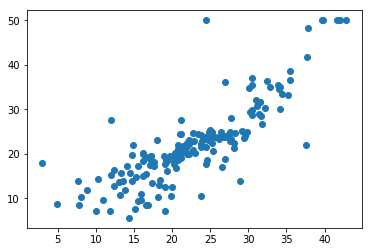

In [90]:
plt.scatter(y_pred, y_test)

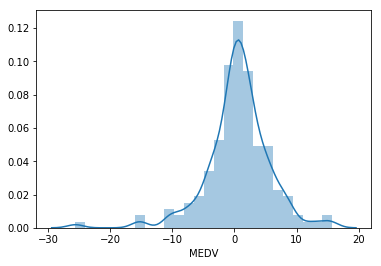

In [91]:
residuals = y_pred - y_test
sns.distplot(y_pred-y_test, kde=True)

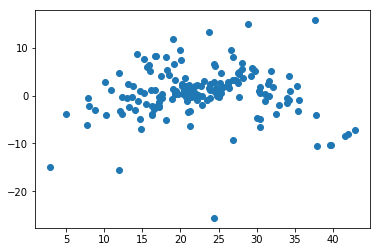

In [92]:
plt.scatter(x=y_pred, y=residuals)

In [97]:
# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# calculate mean square error
mse = mean_squared_error(y_test, y_pred)

# calculate root mean square error
rmse = np.sqrt(mse)

In [98]:
print('mean absolute error', mae)
print('mean sqaure error', mse)
print('root mean square error', rmse)

('mean absolute error', 3.598892331780278)
('mean sqaure error', 26.89778600312894)
('root mean square error', 5.186307549994402)


### Apply Lasso Regression

In [99]:
from sklearn.linear_model import Lasso

In [100]:
# Lasso is applied if there is outliers
model = Lasso(alpha=0.05)

In [101]:
model.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
model.score(X_test, y_test)

0.6761941570563399

In [104]:
y_pred = model.predict(X_test)

In [105]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [106]:
print('mean absolute error', mae)
print('mean sqaure error', mse)
print('root mean square error', rmse)

('mean absolute error', 3.620615391874958)
('mean sqaure error', 27.499910107351088)
('root mean square error', 5.244035669915975)


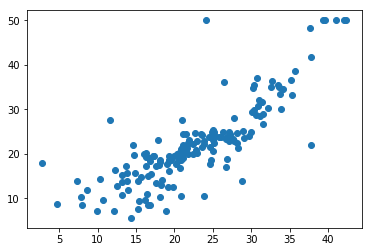

In [107]:
plt.scatter(y_pred, y_test)

In [108]:
residuals = y_pred-y_test

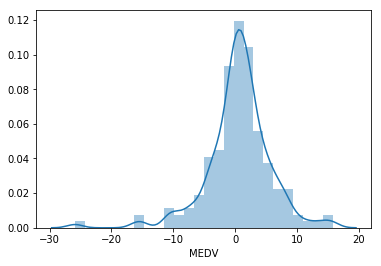

In [109]:
sns.distplot(residuals, kde=True)

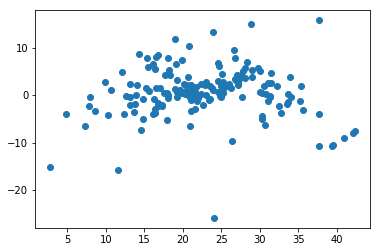

In [110]:
plt.scatter(x=y_pred, y=residuals)

### Apply Ridge Regression

In [111]:
# used incase of Overfitting
from sklearn.linear_model import Ridge

In [112]:
model = Ridge(alpha=0.05)

In [113]:
model.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [114]:
model.score(X_test, y_test)

0.683276403807681

In [115]:
y_pred = model.predict(X_test)

In [116]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [117]:
print('mean absolute error', mae)
print('mean sqaure error', mse)
print('root mean square error', rmse)

('mean absolute error', 3.5987893619488096)
('mean sqaure error', 26.89843501582889)
('root mean square error', 5.186370119440849)


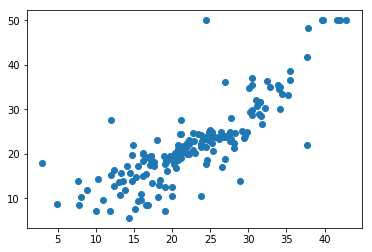

In [118]:
plt.scatter(y_pred, y_test)

In [119]:
residuals = y_pred-y_test

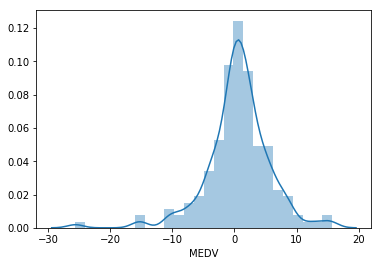

In [120]:
sns.distplot(residuals, kde=True)

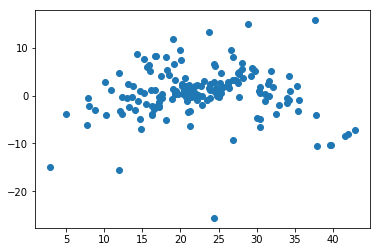

In [121]:
plt.scatter(x=y_pred, y=residuals)

### ElasticNet Regression

In [122]:
from sklearn.linear_model import ElasticNet

In [123]:
reg_elast = ElasticNet(random_state=0)

In [124]:
reg_elast.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
reg_elast.score(X_test, y_test)

0.6099284742938427

In [126]:
y_pred = reg_elast.predict(X_test)

In [127]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [128]:
print('mean absolute error', mae)
print('mean sqaure error', mse)
print('root mean square error', rmse)

('mean absolute error', 4.112710285718658)
('mean sqaure error', 33.127666242338385)
('root mean square error', 5.755663840282751)


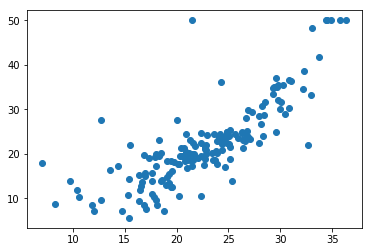

In [129]:
plt.scatter(y_pred, y_test)

In [130]:
residuals = y_pred-y_test

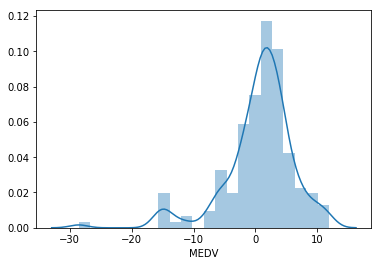

In [131]:
sns.distplot(residuals, kde=True)

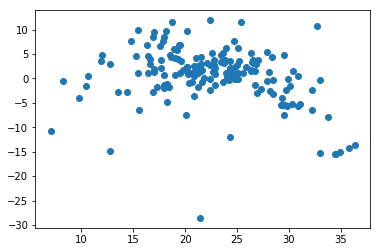

In [132]:
plt.scatter(x=y_pred, y=residuals)